(272, 2)
[ 3.6 79. ]


Text(0, 0.5, 'Waiting(Min)')

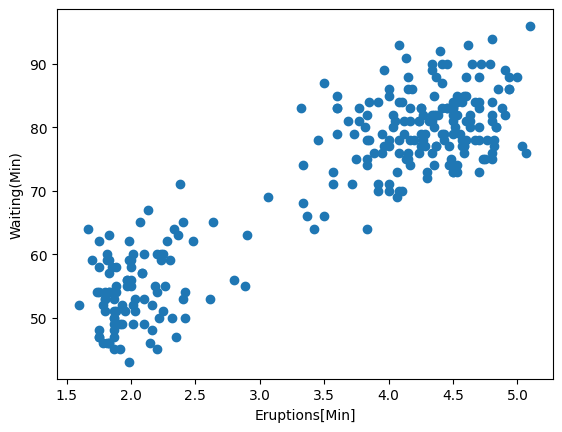

In [2]:
import numpy as np
import matplotlib.pyplot as plt

path = "./old_faithful.txt"
xs = np.loadtxt(path)

# (272,2): 272個の2次元データ
print(xs.shape)
# [3.6 79]: 噴出時間が3.6分、次の噴出までの間隔79分
print(xs[0])

plt.scatter(xs[:, 0], xs[:, 1])
plt.xlabel("Eruptions[Min]")  # 噴出した時間（分）
plt.ylabel("Waiting(Min)")  # 噴出の間隔（分）

GMM(Gauusian Mixture ModeI)
混合ガウスモデル

GMMによる生成モデル\
・モデル化：観測データの分布がGMMによって表現できると仮定する。\
・パラメータ推定: GMMのパラメータを推定する

GMMのパラメータ推定は困難で、最尤推定によって解析的に解くことができずEMアルゴリズムといった高度な手法が必要。

まずパラメータ推定が終わっている前提で話を進める

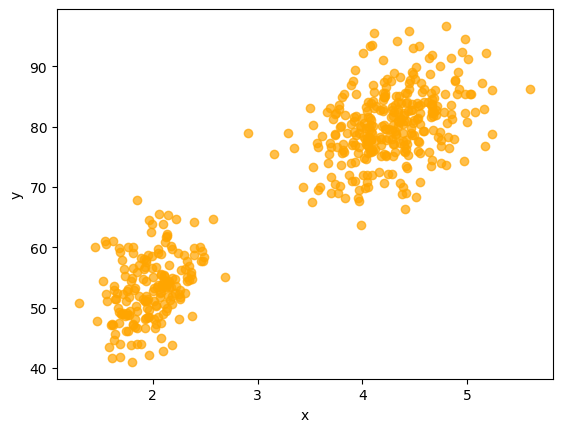

In [3]:
# 学習済みパラメータ
mus = np.array([[2.0, 54.50], [4.3, 80.0]])
covs = np.array([[[0.07, 0.44], [0.44, 33.7]], [[0.17, 0.94], [0.94, 36.00]]])
phis = np.array([0.35, 0.65])  # 1つ目の正規分布の選ばれる確率が0.35, 2つ目の選ばれる確率が0.65を表す。


def sample():
    k = np.random.choice(2, p=phis)  # phisで指定された確率分布に従って0,1のいずれかをサンプリングする。
    mu, cov = mus[k], covs[k]
    x = np.random.multivariate_normal(mu, cov)  # 多次元正規分布からデータを1つサンプリングする
    return x


N = 500
xs = np.zeros((N, 2))
for i in range(N):
    xs[i] = sample()

plt.scatter(xs[:, 0], xs[:, 1], color="orange", alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

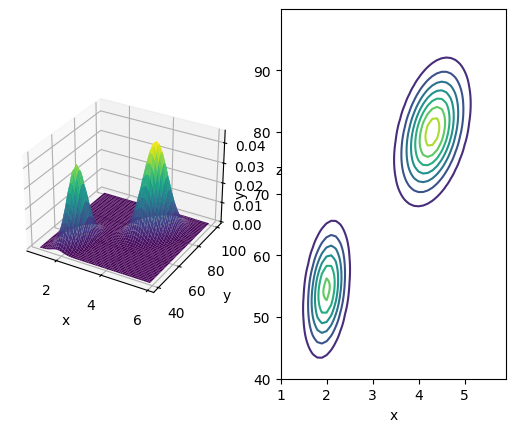

In [5]:
mus = np.array([[2.0, 54.50], [4.3, 80.0]])
covs = np.array([[[0.07, 0.44], [0.44, 33.7]], [[0.17, 0.94], [0.94, 36.00]]])
phis = np.array([0.35, 0.65])


def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y


def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        # パラメータを取り出し正規分布の重み付和を計算
        y += phi * multivariate_normal(x, mu, cov)
    return y


# plot
xs = np.arange(1, 6, 0.1)
ys = np.arange(40, 100, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, phis, mus, covs)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.plot_surface(X, Y, Z, cmap="viridis")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.contour(X, Y, Z)
plt.show()